In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import raw data (xls) and extract informations
def get_rawdata(name, multiplier):
    data = pd.read_excel(name+'.xls', index_col=0, skiprows=0, header=5)
    data = data.reset_index()
    data.columns = ['Date', 'Inverter 1', 'Inverter 2']
    data['Date'] = pd.to_datetime(data['Date']).dt.strftime('%Y-%m-%d %H:%M')
    result = pd.DataFrame(columns = ['Date', 'Combined Data']) 
    result['Date'] = data['Date']
    result['Combined Data'] = data['Inverter 1']*multiplier + data['Inverter 2']*multiplier
    result = result.set_index(pd.DatetimeIndex(result['Date']))
    result = result.drop(['Date'], axis=1)
    
    result['Day'] = result.index.dayofyear
    result['Month'] = result.index.month
    result['Quarter'] = result.index.quarter
    result['Hour'] = result.index.hour
    result['Year'] = result.index.year
    return result

In [3]:
energy = get_rawdata('2008-2019', 0.001)

# Daily Energy by Month

[Text(0, 0.5, 'Daily Energy [kWh]')]

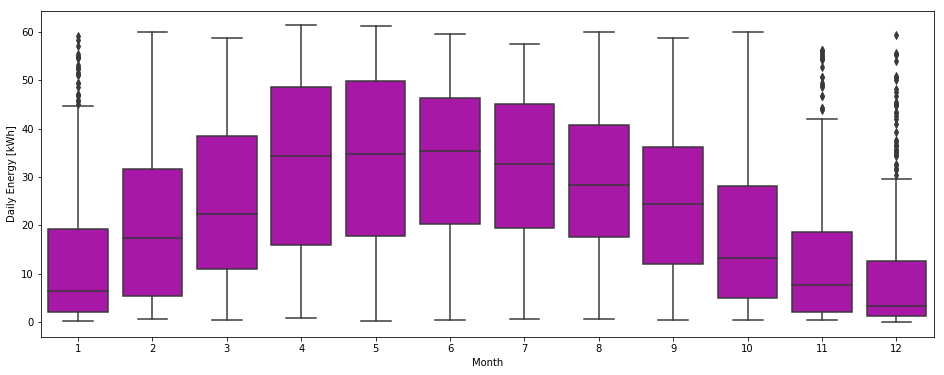

In [15]:
#Plot Daily Energy per Month in a boxplot
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="Month", y="Combined Data", palette=["m"], data=energy)
ax.set(ylabel='Daily Energy [kWh]')

# Daily Energy by Quarter

[Text(0, 0.5, 'Daily Energy [kWh]')]

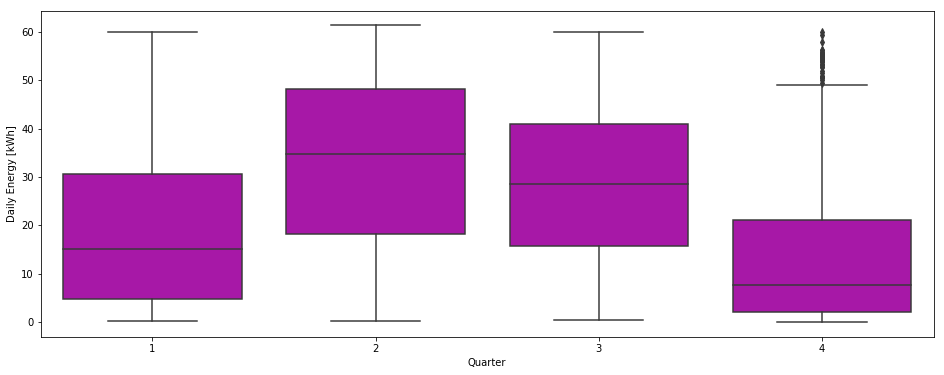

In [16]:
#Plot Daily Energy per Quarter in a boxplot
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="Quarter", y="Combined Data", palette=["m"], data=energy)
ax.set(ylabel='Daily Energy [kWh]')

# Daily Energy by Day of Year

[Text(0, 0.5, 'Daily Energy [kWh]')]

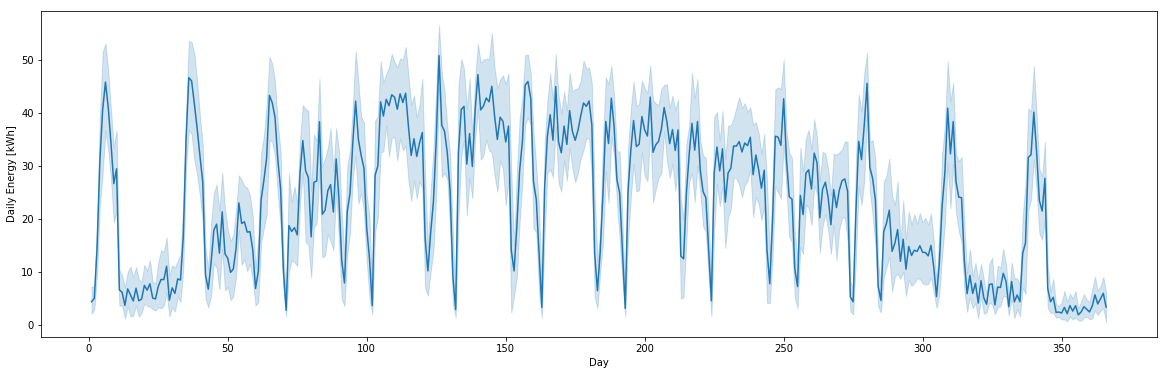

In [6]:
#Plot Daily Energy per day in a single plot
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x="Day", y="Combined Data", palette=["g"], data=energy)
ax.set(ylabel='Daily Energy [kWh]')

# Daily Energy of the whole dataset

[Text(0, 0.5, 'Daily Energy [kWh]')]

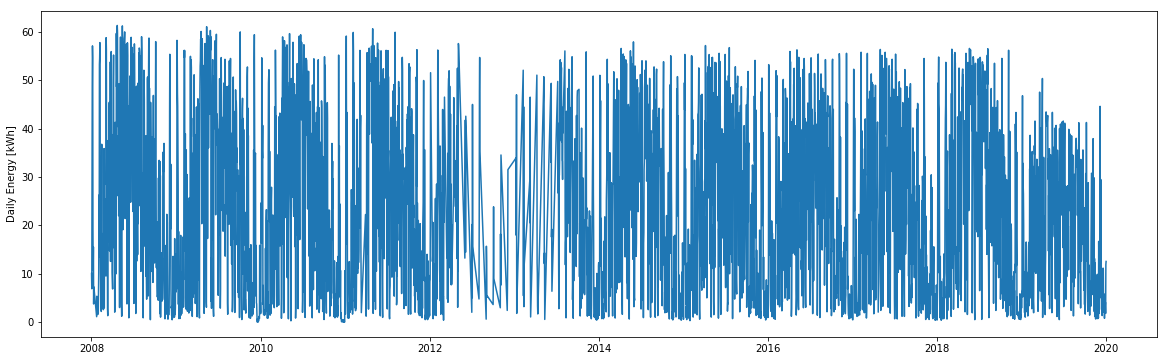

In [11]:
#Plot Daily Energy of all years in a continues plot
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=energy['Combined Data'])
ax.set(ylabel='Daily Energy [kWh]')

# Daily Energy of the whole dataset by year


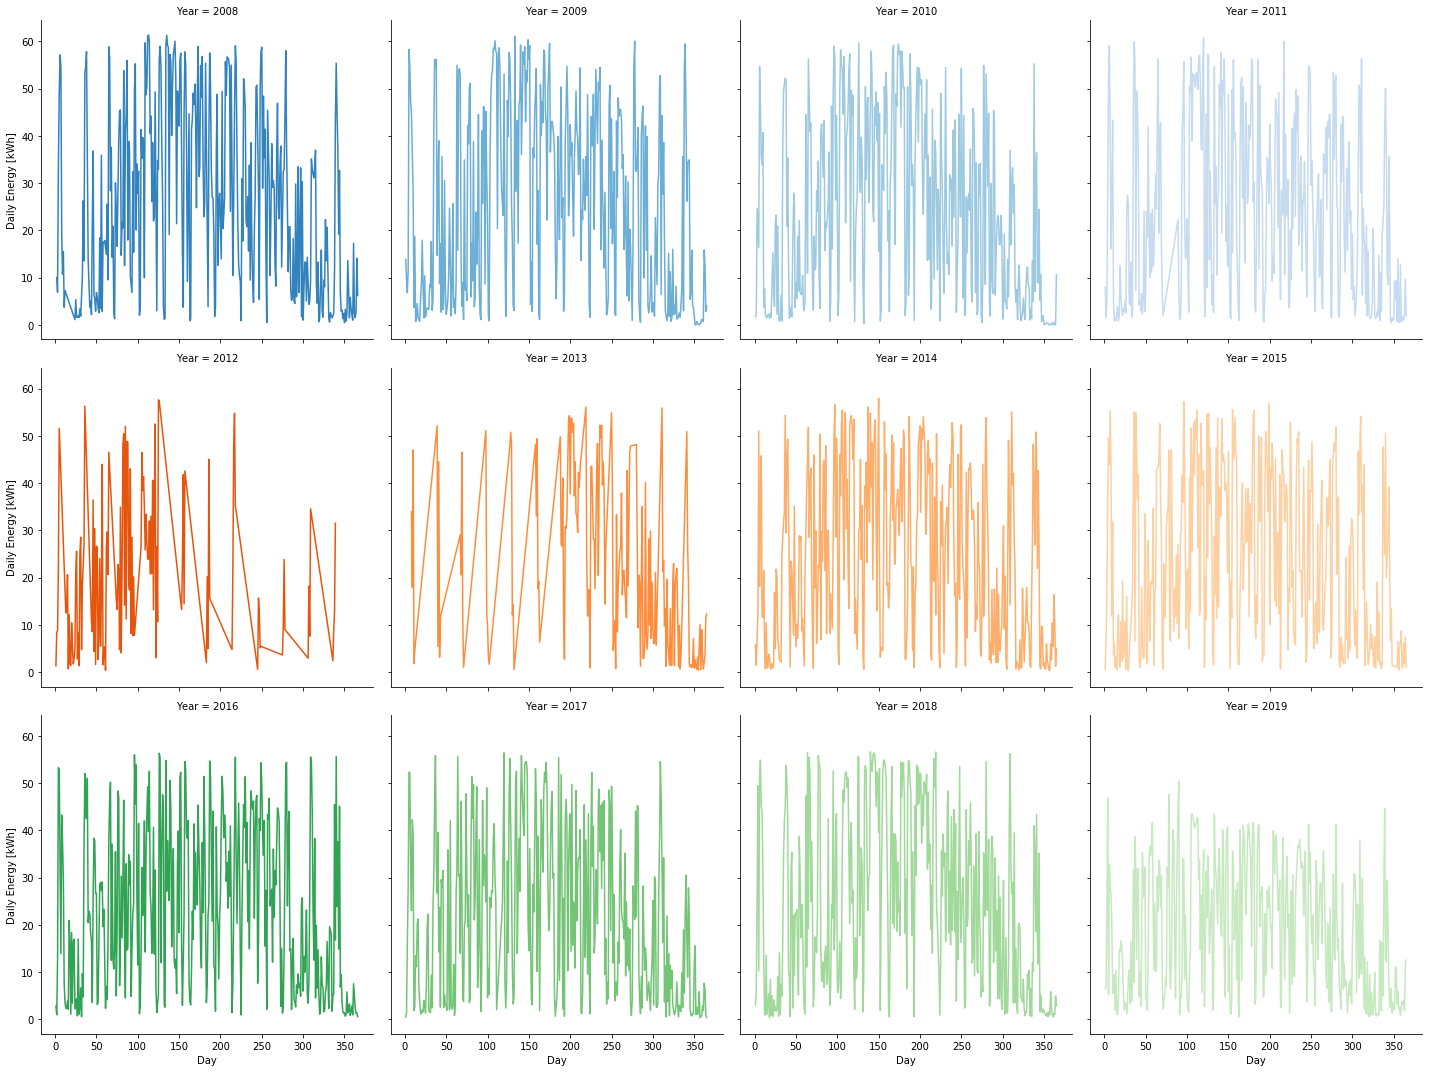

In [10]:
#Plot Daily Energy of all years in a multiplot
grid = sns.FacetGrid(energy, col="Year", hue="Year", palette="tab20c", col_wrap=4, height=5)
ax = grid.map(sns.lineplot, "Day", "Combined Data")
ax.set(ylabel='Daily Energy [kWh]')